In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import DMsimulator as DMsim
from DMoptimize import Optimize

In [2]:

#########* Constants and fixed parameters of the model
const_dict = {
        "F0": 1.5e15,           # cm^-2
        "S0": 3e13,             # cm^-2
        
        "R": 0.00831442,        # kJ/mol*K
        "kBoltz": 1.380649e-23, # J/K
}

#########* Steric factors reactions
steric_dict = {
        ###* Atomic oxygen
        "SF_O_F": 1.0, "SF_O_S": 1.0, "SF_O_SO": 1.0, "SF_O_FO": 1.0,
        "SF_FO_S": 1.0, "SF_FO_SO": 1.0, "SF_FO_FO": 1.0, "SF_FO": 1.0,
        
        ###* Molecular oxygen
        "SF_O2_F": 1.0, "SF_O2_FO": 1.0, "SF_O2_FO2": 1.0, "SF_O_FO2": 1.0,
        "SF_FO2_FO": 1.0, "SF_FO_FO2": 1.0, "SF_FO2": 1.0,
        
        ###* Metastable species
        "SF_O2fast_SO": 0.0, "SF_Ofast_SO": 0.0, "SF_O2fast_S": 0.0,  "SF_Ofast_S": 0.0,
        "SF_Ofast_Sdb": 0.0, "SF_Ofast_SOdb": 0.0, "SF_O2fast_Sdb": 0.0, "SF_O2fast_SOdb": 0.0,
        "SF_O_Sdb": 0.0, "SF_O_SOdb": 0.0, "SF_FO_SOdb": 0.0, "SF_FO_Sdb": 0.0,
}

#########* Energy barriers  --  Based Model
energy_dict = { # kJ/mol and s^-1
        "E_O_F": 0.0, "E_O_S": 0.0, "E_O_SO": 15.0, "E_O_FO": 0.0, 
        "E_FO_SO": 20.0, "E_FO_FO":0.0, "E_di_O": 15.0, "E_de_O": 30.0,
        
        "E_O2_F": 0.0, "E_O2_FO": 0.0, "E_O2_FO2": 0.0, "E_O_FO2": 0.0, 
        "E_FO2_FO": 0.0, "E_FO_FO2": 0.0, "E_di_O2": 15.0, "E_de_O2": 17.5,
        
        "E_O2fast_SO": 0.0, "E_O2fast_S": 0.0, "E_O2fast_SOdb": 0.0, "E_O2fast_Sdb": 0.0, "E_Ofast_Sdb": 0.0,
        "E_Ofast_SOdb": 0.0, "E_O_Sdb": 0.0, "E_O_SOdb": 0.0, "E_F_SOdb": 0.0, "E_FO_SOdb": 0.0,
        "ED_db": 14.999,
        
        "nu_D": 1.0e13, "nu_d": 1.0e15,
        "Emin": 2.90, # eV
        "Ealpha": 3400.0, # K
}

file_input_data = "Experimental_data_TD.hdf5"


In [3]:
class MyOptimize(Optimize):
    
    def modify_energy_dict(self, params, counter):
        
        A, B = params
        Tw = self.input_data_dict[counter]['Tw']
        R = self.const_dict['R']
        
        nu_d = 1e15 * (A + B * np.exp(19.75 / (R * Tw)))
        
        self.energy_dict_base['nu_d'] = nu_d
        
        return self.energy_dict_base
        

In [4]:
loss_func = lambda x, y: (x-y)**2
opt = MyOptimize(const_dict, steric_dict, energy_dict, file_input_data, loss_func, max_time=15)
global_bounds = [(1e-5, 1.0), (1e-7, 1.0)]


config_opt_dict = {
    "bounds": global_bounds,
    "nb_de_calls": 5,
    "de_maxiter": 10,
    "local_attempts": 5,
    "epsilon_local": 1e-2
}


best_local, best_local_loss = opt.hybrid_search(config_opt_dict)



Loss:  5.4081080804444434e-05 Params:  [0.39866488 0.04395194]
Loss:  5.4193660435462044e-05 Params:  [0.43068902 0.74213431]
Loss:  5.4185866134814814e-05 Params:  [0.43947999 0.35301891]
Loss:  5.4023677487481e-05 Params:  [0.29628574 0.02976945]
Loss:  5.419058088647587e-05 Params:  [0.86053431 0.51683737]
Loss:  5.418482000783725e-05 Params:  [0.30606523 0.32985545]
Loss:  5.419454260575476e-05 Params:  [0.4877723  0.84791543]
Loss:  5.4170124789790864e-05 Params:  [0.33709863 0.17153   ]
Loss:  5.41916296070346e-05 Params:  [0.67215889 0.57646269]
Loss:  5.415960575323638e-05 Params:  [0.79679585 0.12754174]
Loss:  5.419480940464742e-05 Params:  [0.09500561 0.88624752]
Loss:  5.4189373944956915e-05 Params:  [0.06377134 0.4621556 ]
Loss:  5.417852828557262e-05 Params:  [0.7222249  0.23628437]
Loss:  5.4192233748269003e-05 Params:  [0.80390374 0.61741051]
Loss:  5.419276818534477e-05 Params:  [0.52772175 0.65894439]
Loss:  5.4162570457870124e-05 Params:  [0.10505418 0.13767191]
Loss

In [5]:
loss_initial = opt.functional_loss([1.0, 0.0])
loss_paper = opt.functional_loss([0.01634, 1.67e-4])

loss_final = opt.functional_loss(best_local)

print("Gain: ", np.abs(loss_paper - loss_final)/loss_paper*100)

Loss:  4.652824417478092e-05 Params:  [1.0, 0.0]
Loss:  8.415585968398335e-06 Params:  [0.01634, 0.000167]


In [18]:
#### sensibility analysis

perturbation = np.linspace(-1.0, 1.0, 30)
costs = []
for i in range(len(perturbation)):
    costs_aux = []
    for j in range(len(best_local)):
        params = best_local.copy()
        params[j] += 0.1*params[j]*perturbation[i]
        cost = opt.functional_loss(params)
        costs_aux.append(cost)
    costs.append(costs_aux)

costs = np.array(costs)

Loss:  6.991755007971764e-06 Params:  [0.061339212, 0.00013756]
Loss:  8.328481993527844e-06 Params:  [0.06815468, 0.000123804]
Loss:  6.98871940839661e-06 Params:  [0.06180924427586206, 0.00013756]
Loss:  8.124829281408877e-06 Params:  [0.06815468, 0.0001247526896551724]
Loss:  6.985894378584146e-06 Params:  [0.06227927655172413, 0.00013756]
Loss:  7.941074394788096e-06 Params:  [0.06815468, 0.00012570137931034483]
Loss:  6.983277774226483e-06 Params:  [0.0627493088275862, 0.00013756]
Loss:  7.776213930678734e-06 Params:  [0.06815468, 0.00012665006896551723]
Loss:  6.980867474780459e-06 Params:  [0.06321934110344828, 0.00013756]
Loss:  7.629295703218062e-06 Params:  [0.06815468, 0.00012759875862068966]
Loss:  6.9786613831643735e-06 Params:  [0.06368937337931034, 0.00013756]
Loss:  7.499415905484199e-06 Params:  [0.06815468, 0.00012854744827586208]
Loss:  6.976657425459219e-06 Params:  [0.0641594056551724, 0.00013756]
Loss:  7.38571644390529e-06 Params:  [0.06815468, 0.0001294961379310

[[6.99175501e-06 8.32848199e-06]
 [6.98871941e-06 8.12482928e-06]
 [6.98589438e-06 7.94107439e-06]
 [6.98327777e-06 7.77621393e-06]
 [6.98086747e-06 7.62929570e-06]
 [6.97866138e-06 7.49941591e-06]
 [6.97665743e-06 7.38571644e-06]
 [6.97485355e-06 7.28738243e-06]
 [6.97324773e-06 7.20363985e-06]
 [6.97183796e-06 7.13375329e-06]
 [6.97062225e-06 7.07702394e-06]
 [6.96959864e-06 7.03278756e-06]
 [6.96876520e-06 7.00041268e-06]
 [6.96811999e-06 6.97929885e-06]
 [6.96766113e-06 6.96887499e-06]
 [6.96738673e-06 6.96859786e-06]
 [6.96729494e-06 6.97795064e-06]
 [6.96738391e-06 6.99644148e-06]
 [6.96765184e-06 7.02360228e-06]
 [6.96809691e-06 7.05898743e-06]
 [6.96871736e-06 7.10217270e-06]
 [6.96951143e-06 7.15275410e-06]
 [6.97047737e-06 7.21034686e-06]
 [6.97161346e-06 7.27458453e-06]
 [6.97291800e-06 7.34511795e-06]
 [6.97438930e-06 7.42161447e-06]
 [6.97602570e-06 7.50375712e-06]
 [6.97782554e-06 7.59124378e-06]
 [6.97978720e-06 7.68378650e-06]
 [6.98190906e-06 7.78111078e-06]]


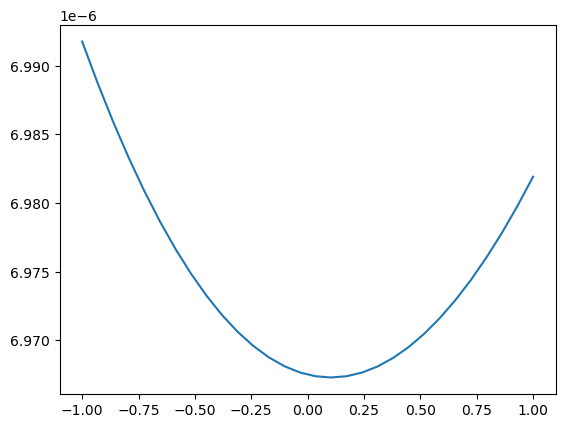

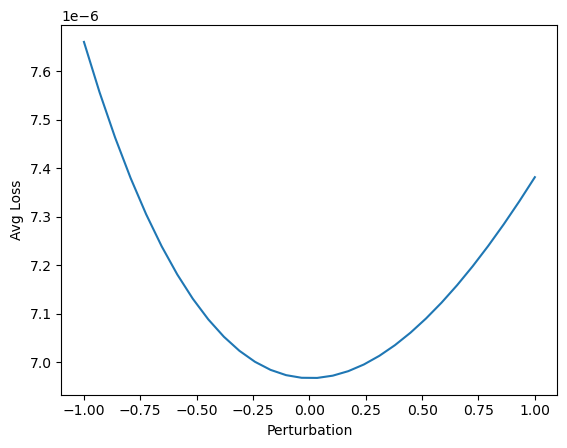

In [19]:
costs = np.array(costs)
print(costs)

plt.figure()
plt.plot(perturbation, costs[:, 0], label='A')

plt.figure()
# plt.plot(perturbation, costs[:, 1], label='B')
plt.plot(perturbation, np.mean(costs, axis=1), label='Total')
plt.xlabel('Perturbation')
plt.ylabel('Avg Loss')
plt.savefig("figures/sensibility_analysis.png")